<a href="https://colab.research.google.com/github/Shalinda99/fyp-HFI-module/blob/main/hemas_holdings_plc_Close_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import files



drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the dataset
price_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SP_SL_20_dataset_final.csv')
price_df.head()

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name,Stock Return
0,1/31/2025,120.75,121.5,119.00,119.50,523,1016885,122167426.0,SAMPATH BANK PLC,NaN
1,1/30/2025,119.75,120.5,118.75,120.00,587,1279402,152615285.3,SAMPATH BANK PLC,NaN
2,1/29/2025,122.00,122.0,118.50,119.25,1354,2563188,307574122.8,SAMPATH BANK PLC,NaN
3,1/28/2025,122.00,122.5,121.00,121.25,838,990361,120261351.3,SAMPATH BANK PLC,NaN
4,1/27/2025,122.00,123.0,121.50,122.00,694,895710,109462379.0,SAMPATH BANK PLC,NaN


In [ ]:
hemas_holdings_plc_price_df = price_df[price_df['Company Name'] == "HEMAS HOLDINGS PLC"]

In [ ]:
hemas_holdings_plc_price_df['Trade Date'] = pd.to_datetime(hemas_holdings_plc_price_df['Trade Date']).dt.date

/tmp/ipython-input-4-853528984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hemas_holdings_plc_price_df['Trade Date'] = pd.to_datetime(hemas_holdings_plc_price_df['Trade Date']).dt.date


In [ ]:
hemas_holdings_plc_price_df

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name,Stock Return
8254,2025-01-31,114.00,114.25,113.00,114.00,71,1090991,1.243381e+08,HEMAS HOLDINGS PLC,NaN
8255,2025-01-30,115.00,115.00,112.50,113.75,105,68407,7.742120e+06,HEMAS HOLDINGS PLC,NaN
8256,2025-01-29,115.00,116.25,113.75,114.25,121,237733,2.730137e+07,HEMAS HOLDINGS PLC,NaN
8257,2025-01-28,116.75,116.75,114.25,114.75,110,573011,6.598075e+07,HEMAS HOLDINGS PLC,NaN
8258,2025-01-27,113.75,116.00,113.00,115.25,128,198736,2.285029e+07,HEMAS HOLDINGS PLC,NaN
...,...,...,...,...,...,...,...,...,...,...
9433,2020-01-08,78.00,78.00,78.00,78.00,2,110,8.580000e+03,HEMAS HOLDINGS PLC,NaN
9434,2020-01-07,78.30,78.30,76.60,76.60,12,1215,9.338540e+04,HEMAS HOLDINGS PLC,NaN
9435,2020-01-06,79.00,79.00,78.30,78.30,12,508076,3.963394e+07,HEMAS HOLDINGS PLC,NaN
9436,2020-01-03,78.40,79.40,78.40,79.40,2,52,4.126800e+03,HEMAS HOLDINGS PLC,NaN


In [ ]:
import matplotlib.pyplot as plt

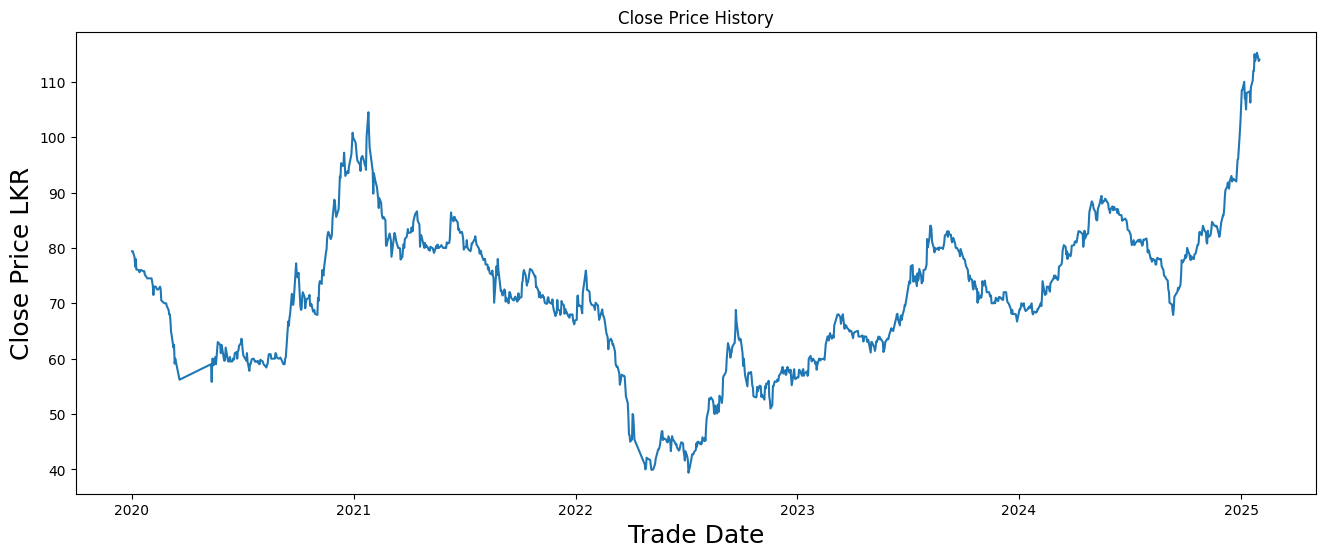

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(hemas_holdings_plc_price_df['Trade Date'],hemas_holdings_plc_price_df['Close (Rs.)'])
plt.xlabel('Trade Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = hemas_holdings_plc_price_df.filter(['Close (Rs.)'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1125

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.98352011],
       [0.98022413],
       [0.98681608],
       ...,
       [0.51285432],
       [0.52735662],
       [0.52735662]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.98352011, 0.98022413, 0.98681608, 0.99340804, 1.        ,
       0.98022413, 0.99670402, 0.95715227, 0.95715227, 0.93408042,
       0.91760053, 0.88134476, 0.90771259, 0.90441661, 0.86486486,
       0.88793672, 0.8912327 , 0.93078444, 0.91100857, 0.91100857,
       0.84179301, 0.81542518, 0.74752802, 0.74489123, 0.69347396,
       0.69479235, 0.69874753, 0.70006592, 0.69611074, 0.69347396,
       0.70665788, 0.69347396, 0.67633487, 0.68292683, 0.69083718,
       0.68160844, 0.6723797 , 0.65524061, 0.62755438, 0.61305208,
       0.61305208, 0.59459459, 0.58141068, 0.56822676, 0.56163481,
       0.56822676, 0.58668425, 0.58536585, 0.58800264, 0.58800264,
       0.58800264, 0.59723138, 0.58141068, 0.56954515, 0.56427159,
       0.56163481, 0.57613711, 0.54581411, 0.54845089, 0.57086355])]
[np.float64(0.5787738958470666)]

[array([0.98352011, 0.98022413, 0.98681608, 0.99340804, 1.        ,
       0.98022413, 0.99670402, 0.95715227, 0.95715227, 0.93408042,
       0.91760053, 0.881

In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam")

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 44s 34ms/step - loss: 0.0039
Epoch 2/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - loss: 0.0012
Epoch 3/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - loss: 0.0012
Epoch 4/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 36s 33ms/step - loss: 9.7260e-04
Epoch 5/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - loss: 7.5018e-04
Epoch 6/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - loss: 7.1739e-04
Epoch 7/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - loss: 6.1660e-04
Epoch 8/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - loss: 6.5825e-04
Epoch 9/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - loss: 6.6061e-04
Epoch 10/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 35s 33ms/step - loss: 5.3319e-04
Epoch 11/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 35s 33ms/step - loss: 5.1315e-04
Epoch 12/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - loss: 5.1484e-04
Epoch 13/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - loss: 6.7285e-04
Epoch 14/20
1065/1065 ━━━━━━━━━━━

In [ ]:
model.save('/content/drive/My Drive/FYP/hemas_holdings_plc_lstm_model.h5')

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 421ms/step


np.float64(1.4961734712273376)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: 0.9487381024246402


/tmp/ipython-input-16-1041969288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


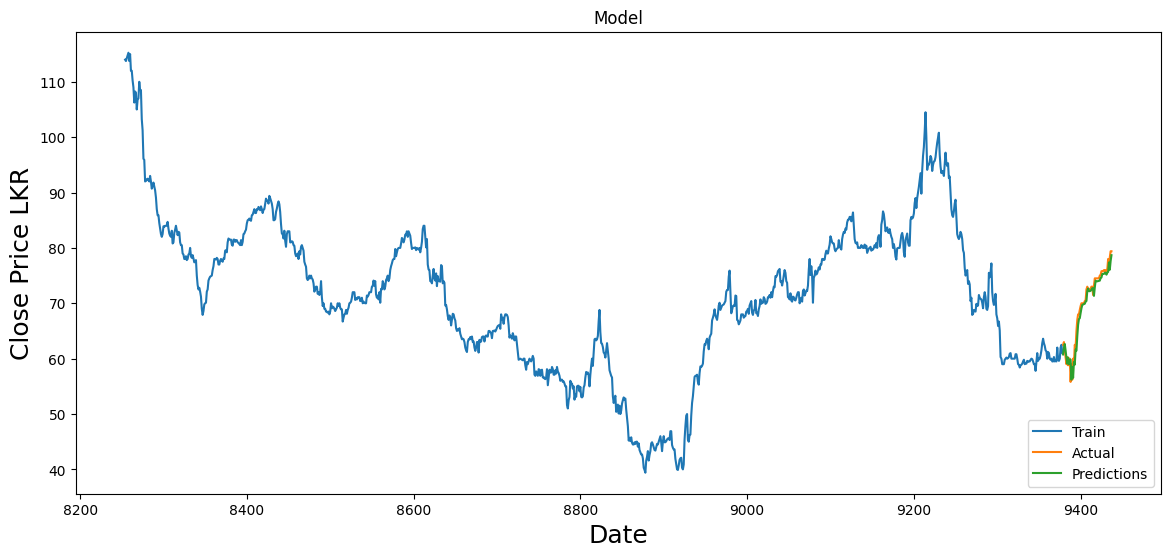

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.plot(train['Close (Rs.)'])
plt.plot(valid[['Close (Rs.)', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()